In [1]:
# Installation
!pip install --extra-index-url https://test.pypi.org/simple/ casadata==0.0.1rc13  > /dev/null

# Measures Data

---

Inspect available versions of measures data and retrieve one

In [2]:
import casadata

versions = casadata.measures_available()

print(versions[-5:])

['20210731-160001', '20210801-160001', '20210802-160001', '20210803-160001', '20210804-160001']


In [3]:
casadata.measures_update('data', version=versions[-1])

connecting to ftp.astron.nl ...
downloading data from ASTRON server ...


In [4]:
!ls data/geodetic

IERSeop2000  IERSpredict      IGRF  KpApF107	   SCHED_locations
IERSeop97    IERSpredict2000  IMF   Observatories  TAI_UTC


Set the path to the downloaded measures data so casacore can find it

In [5]:
casadata.set_data_dir('data')

writing /root/.casarc...


In [6]:
!more /root/.casarc

measures.directory: /content/data


Try using casacore to verify it got the data

In [7]:
from casacore.measures import measures
measures().observatory('ALMA')

{'m0': {'unit': 'rad', 'value': -1.1825465955049892},
 'm1': {'unit': 'rad', 'value': -0.4018251640113072},
 'm2': {'unit': 'm', 'value': 5056.8},
 'refer': 'WGS84',
 'type': 'position'}

Open and inspect the measures data contents

In [8]:
xds = casadata.table_open('data/geodetic/IERSpredict')

xds

<xarray.Dataset>
Dimensions:  (d0: 722)
Dimensions without coordinates: d0
Data variables: (12/13)
    MJD      (d0) float64 5.88e+04 5.88e+04 5.88e+04 ... 5.952e+04 5.952e+04
    X        (d0) float64 0.1556 0.1544 0.1532 0.1521 ... 0.1742 0.1733 0.1718
    DX       (d0) float64 1.9e-05 3e-05 3e-05 ... 0.007916 0.008175 0.007888
    Y        (d0) float64 0.275 0.275 0.275 0.275 ... 0.2528 0.2528 0.251 0.2493
    DY       (d0) float64 2.1e-05 2.4e-05 2.6e-05 ... 0.0106 0.01041 0.01058
    DUT1     (d0) float64 -0.1629 -0.1634 -0.1639 ... -0.1266 -0.1274 -0.1279
    ...       ...
    LOD      (d0) float64 0.0005854 0.0004804 0.0003702 ... 0.0 0.0 0.0
    DLOD     (d0) float64 2.7e-06 4.3e-06 3e-06 3.3e-06 ... 0.0 0.0 0.0 0.0
    DPSI     (d0) float64 -112.4 -112.5 -112.5 -112.3 -112.1 ... 0.0 0.0 0.0 0.0
    DDPSI    (d0) float64 0.174 0.086 0.086 0.086 0.081 ... 0.0 0.0 0.0 0.0 0.0
    DEPS     (d0) float64 -7.223 -7.307 -7.465 -7.583 -7.617 ... 0.0 0.0 0.0 0.0
    DDEPS    (d0) float64 0.183 0.26 0.26 0.26 0.272 ... 0.0 0.0 0.0 0.0 0.0
Attributes: (12/20)
    vs_create:    2020/02/10/03:00
    vs_date:      2021/08/04/15:00
    vs_version:   0623.0541
    vs_type:      IERS Earth Orientation Data predicted from NEOS
    tab_version:  0002.0000
    mjd0:         58798.0
    ...           ...
    lod_unit:     s
    dlod_unit:    s
    dpsi_unit:    arcsec
    ddpsi_unit:   arcsec
    deps_unit:    arcsec
    ddeps_unit:   arcsec

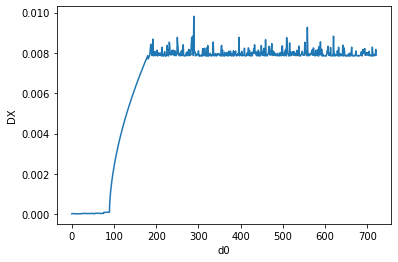

In [9]:
xds.DX.plot()

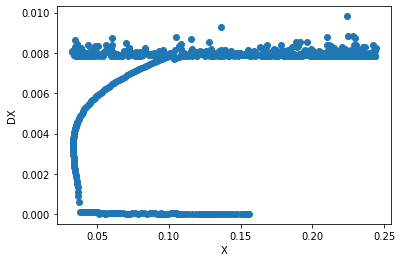

In [10]:
xds.plot.scatter('X','DX')

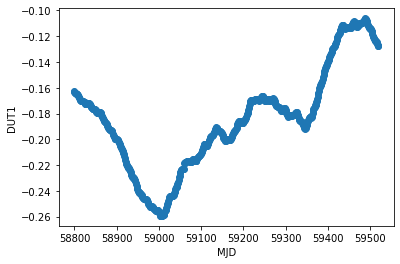

In [11]:
xds.plot.scatter('MJD','DUT1')

Compare an older version to the latest version

In [12]:
casadata.measures_update('data2', version=versions[0])
xds2 = casadata.table_open('data2/geodetic/IERSpredict')

connecting to ftp.astron.nl ...
downloading data from ASTRON server ...


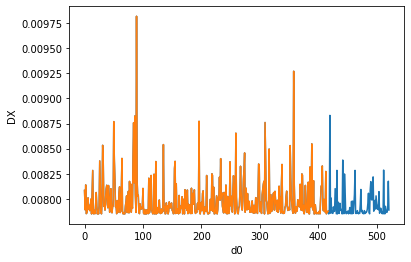

In [13]:
xds.DX[200:].plot()
xds2.DX[200:].plot()